# Taller 2

### Integrantes: Constance Barthou, Isidora Lin, Amparo Morel, Paulo Padilla

Se utilizarán datos entregados con 300 entradas de un banco. El objetivo es segmentar e identificar los clusters.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Carga y limpieza de los datos

In [ ]:
datos = pd.read_csv('300.csv', sep=";")

datos.drop(['CustID'], axis = 'columns', inplace=True)

# Contar y eliminar filas duplicadas
num_duplicadas = datos.duplicated().sum()
datos.drop_duplicates(inplace=True)

# Verificar y contar valores nulos
nulos = datos.isnull().sum().sum()

# Imprimir resultados
print(f"\n Filas duplicadas eliminadas: {num_duplicadas if num_duplicadas > 0 else '0'}")
if datos.isnull().any().any():
  print("\n Hay datos nulos en la BBDD, aquí el desglose: \n", datos.isnull().sum())
else:
  print ("\n No hay datos nulos en la BBDD\n")


#Análisis de los datos luego de la limpieza
datos.info()

datos.head()


 Filas duplicadas eliminadas: 1

 No hay datos nulos en la BBDD

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 299
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Age           299 non-null    int64
 1   Income        299 non-null    int64
 2   Assets        299 non-null    int64
 3   Credit        299 non-null    int64
 4   Contr_Margin  299 non-null    int64
dtypes: int64(5)
memory usage: 14.0 KB


,Age,Income,Assets,Credit,Contr_Margin
0,35,681,0,-1177,-5
1,60,2218,6500,0,131
2,53,537,6577,0,177
3,56,4397,21333,0,-50
4,38,2813,6667,0,-32


## Matriz de correlación


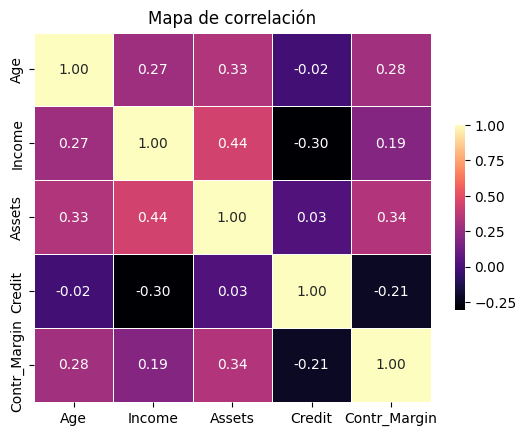

In [ ]:
# Calculamos la matriz de correlación
correlaciones = datos.corr()

# Creamos un heatmap con seaborn
sns.heatmap(correlaciones,
            annot=True,     # Esto imprimirá los valores de las correlaciones en el heatmap
            cmap='magma',
            fmt=".2f",      # Formato de los números dentro del heatmap
            linewidths=.5,  # Espacio entre las celdas del heatmap
            cbar_kws={"shrink": .5} # Opciones para la barra de color, en este caso la hacemos más pequeña
           )

plt.title('Mapa de correlación')
plt.show()


## Entrenamiento K-means

In [ ]:
# Crear el objeto k means con 5 clusters
km = KMeans(n_clusters=5, init="k-means++", n_init=5)

# Entrenamiento del modelo
km = km.fit(datos)
print(km)

print("El número de puntos por cada cluster es: ")
print(pd.DataFrame(km.labels_).value_counts())

KMeans(n_clusters=5, n_init=5)
El número de puntos por cada cluster es: 
1    208
0     55
4     19
2     11
3      6
Name: count, dtype: int64


In [ ]:
#Obtenemos los centros de los segmentos
datos_columnas = datos.columns
centroides = pd.DataFrame(km.cluster_centers_, columns = datos_columnas.tolist())
centroides

,Age,Income,Assets,Credit,Contr_Margin
0,57.636364,2513.963636,34186.690909,-1143.218182,186.054545
1,37.072115,1630.706731,5302.658654,-923.822115,26.379808
2,42.636364,4206.363636,14884.909091,-108484.909091,316.727273
3,53.000000,5902.333333,106622.333333,0.000000,379.000000
4,42.526316,3013.473684,5515.736842,-35098.631579,202.315789


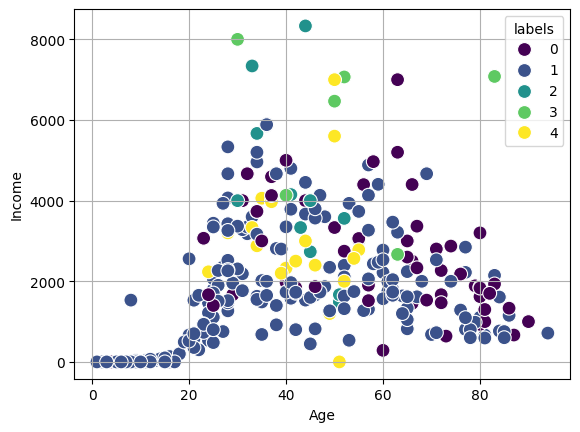

In [ ]:
datos["labels"] = km.labels_
sns.scatterplot(data=datos, x='Age', y='Income', hue='labels', palette='viridis', s=100)

# Configurar etiquetas
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid()

# Mostrar el gráfico
plt.show()


### K-means escalado

In [ ]:
datos_escalados = datos.copy()
scaler = StandardScaler()

# Ajuste y entrenamiento
datos_escalados[datos.columns] = scaler.fit_transform(datos_escalados[datos.columns])
km = KMeans(n_clusters=5, init="k-means++", n_init=20)
km.fit(datos_escalados)


KMeans(n_clusters=5, n_init=20)

In [ ]:
#Obtenemos los centros de los segmentos
datos_columnas = datos_escalados.columns
centroides = pd.DataFrame(km.cluster_centers_, columns = datos_columnas.tolist())
centroides

,Age,Income,Assets,Credit,Contr_Margin,labels
0,1.063126,0.118890,0.911509,0.308172,0.717897,-0.923622
1,0.257221,0.293640,-0.287231,0.235846,-0.359523,-0.151011
2,-1.186503,-0.986925,-0.496861,0.311035,-0.317995,-0.129168
3,0.036161,0.813846,-0.214453,-2.476722,0.697875,2.345989
4,0.484819,2.249858,4.939674,0.318960,1.287099,2.059420


                Age        Income        Assets        Credit  Contr_Margin  \
count  2.990000e+02  2.990000e+02  2.990000e+02  2.990000e+02  2.990000e+02   
mean   8.911489e-18 -9.802638e-17 -5.940993e-18  2.970496e-17 -1.782298e-17   
std    1.001676e+00  1.001676e+00  1.001676e+00  1.001676e+00  1.001676e+00   
min   -1.751302e+00 -1.207592e+00 -6.868042e-01 -5.993163e+00 -3.287333e+00   
25%   -7.192463e-01 -7.858323e-01 -6.164616e-01  3.189597e-01 -5.190580e-01   
50%   -7.421138e-02 -1.924404e-01 -3.701832e-01  3.189597e-01 -2.435425e-01   
75%    7.858352e-01  6.182747e-01  2.138242e-01  3.189597e-01  3.315416e-01   
max    2.247914e+00  3.673687e+00  5.469732e+00  3.189597e-01  4.352756e+00   

           labels  
count  299.000000  
mean     1.341137  
std      0.967949  
min      0.000000  
25%      1.000000  
50%      1.000000  
75%      2.000000  
max      4.000000  


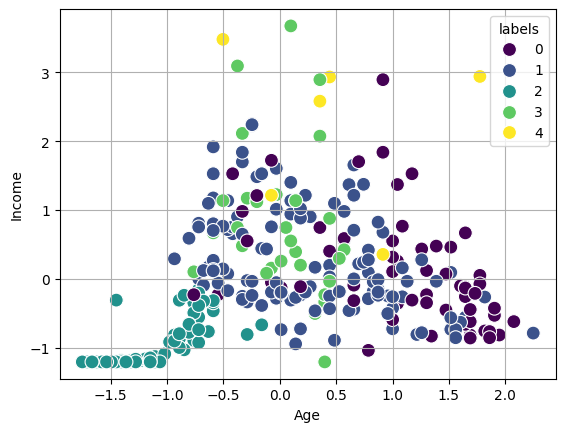

In [ ]:
# Crear un DataFrame para los datos escalados
datos_escalados_df = pd.DataFrame(datos_escalados, columns=datos.columns)
datos_escalados_df['labels'] = km.labels_

print(datos_escalados_df.describe())

# Visualización de los datos escalados
sns.scatterplot(data=datos_escalados_df, x='Age', y='Income', hue='labels', palette='viridis', s=100)
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid()
plt.show()

### Métricas de la clusterización

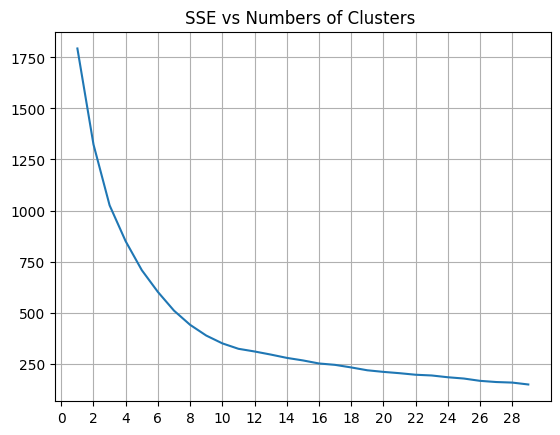

In [ ]:
sse = [] #Variable para guardar el within cluster distance
K = 30 #Número de cluster que evaluaremos
for k in range(1, K):
    kmeans = KMeans(n_clusters=k, n_init=10) #Creamos objeto Kmeans con K clusters, limite 10 por tiempo.
    kmeans.fit(datos_escalados) #Entrenamos el modelo con datos escalados
    sse.append(kmeans.inertia_) #Obtenemos el SSE de la iteración

#Graficamos para usar el método del codo al momento de escoger
plt.plot(range(1, K), sse)
plt.title("SSE vs Numbers of Clusters ")
plt.grid()
plt.xticks(range(0,30,2))
plt.show()

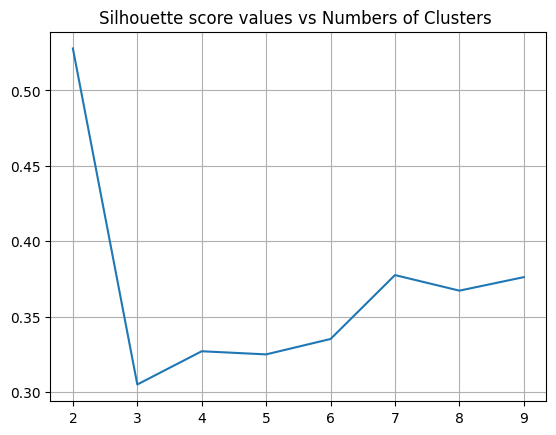

Optimal number of components is:
2


In [ ]:
from sklearn import metrics
silhouette_score_values=list()

NumberOfClusters=range(2,10)

for i in NumberOfClusters:
    classifier = KMeans(i, init='k-means++', n_init=10)
    classifier.fit(datos_escalados) #Usaremos datos escalados
    labels = classifier.labels_
    silhouette_score_values.append(metrics.silhouette_score(datos_escalados, labels ,metric='euclidean', sample_size=None, random_state=None))


plt.plot(NumberOfClusters, silhouette_score_values)
plt.title("Silhouette score values vs Numbers of Clusters ")
plt.grid()
plt.show()

Optimal_NumberOf_Components=NumberOfClusters[silhouette_score_values.index(max(silhouette_score_values))]
print("Optimal number of components is:")
print(Optimal_NumberOf_Components)

## Test con MinMax

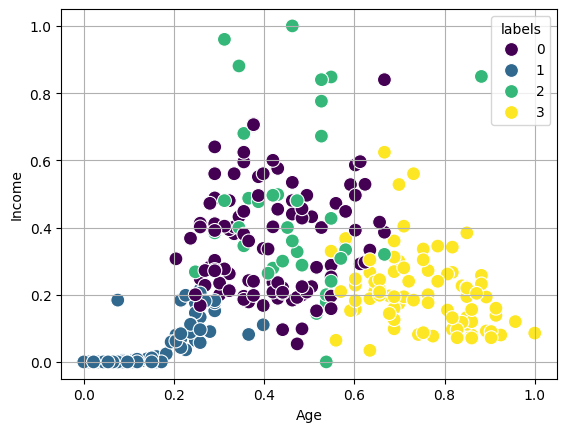

                Age        Income        Assets        Credit  Contr_Margin  \
count  2.990000e+02  2.990000e+02  2.990000e+02  2.990000e+02  2.990000e+02   
mean   8.911489e-18 -9.802638e-17 -5.940993e-18  2.970496e-17 -1.782298e-17   
std    1.001676e+00  1.001676e+00  1.001676e+00  1.001676e+00  1.001676e+00   
min   -1.751302e+00 -1.207592e+00 -6.868042e-01 -5.993163e+00 -3.287333e+00   
25%   -7.192463e-01 -7.858323e-01 -6.164616e-01  3.189597e-01 -5.190580e-01   
50%   -7.421138e-02 -1.924404e-01 -3.701832e-01  3.189597e-01 -2.435425e-01   
75%    7.858352e-01  6.182747e-01  2.138242e-01  3.189597e-01  3.315416e-01   
max    2.247914e+00  3.673687e+00  5.469732e+00  3.189597e-01  4.352756e+00   

           labels  
count  299.000000  
mean     1.341137  
std      0.967949  
min      0.000000  
25%      1.000000  
50%      1.000000  
75%      2.000000  
max      4.000000  


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
datos_normalizados = scaler.fit_transform(datos)

#Crear y entrenar el modelo K-Means
km = KMeans(n_clusters=4, init="k-means++", n_init=20)
km.fit(datos_normalizados)

#Convertir a DataFrame y visualización
datos_normalizados_df = pd.DataFrame(datos_normalizados, columns=datos.columns)
datos_normalizados_df['labels'] = km.labels_
sns.scatterplot(data=datos_normalizados_df, x='Age', y='Income', hue='labels', palette='viridis', s=100)
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid()
plt.show()


print(datos_escalados_df.describe())

# Fuzzy C means

In [ ]:
!pip install scikit-fuzzy

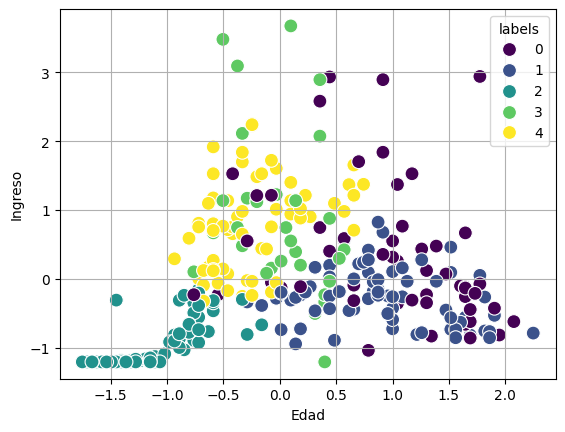

        Cluster_1   Cluster_2   Cluster_3   Cluster_4   Cluster_5
count  299.000000  299.000000  299.000000  299.000000  299.000000
mean     0.157344    0.238624    0.298827    0.085726    0.219478
std      0.182826    0.211817    0.335621    0.163490    0.197136
min      0.002638    0.005200    0.012550    0.001667    0.005688
25%      0.044886    0.092473    0.071861    0.018224    0.082267
50%      0.077160    0.180236    0.115920    0.031829    0.155041
75%      0.194813    0.309284    0.457239    0.056310    0.294741
max      0.853970    0.918086    0.984807    0.894160    0.916473


In [ ]:
from sklearn import datasets
import skfuzzy as fuzz

datos_escalados = datos.copy()
scaler = StandardScaler()
datos_escalados[datos.columns] = scaler.fit_transform(datos_escalados[datos.columns])

datos_escalados_matriz = datos_escalados.values.T

n_clusters = 5

cntr5, u5, u05, d5, jm5, p5, fpc5 = fuzz.cluster.cmeans(
    datos_escalados_matriz, n_clusters, 2, error=0.005, maxiter=1000, init=None)

labels = np.argmax(u5, axis=0)

datos_escalados['labels'] = labels

sns.scatterplot(data=datos_escalados, x='Age', y='Income', hue='labels', palette='viridis', s=100)
plt.xlabel('Edad')
plt.ylabel('Ingreso')
plt.grid()
plt.show()

cluster_summary = pd.DataFrame(u5.T, columns=[f'Cluster_{i+1}' for i in range(n_clusters)])
print(cluster_summary.describe())


In [ ]:
print(u5)
print(u5.shape)

[[0.06492479 0.05717791 0.1409782  ... 0.00609596 0.10193474 0.23851171]
 [0.2352119  0.80782197 0.52084731 ... 0.01274611 0.17994893 0.18779708]
 [0.49726236 0.02663445 0.1507778  ... 0.96411078 0.11565715 0.14835102]
 [0.03145174 0.01210668 0.03799875 ... 0.00384937 0.07824359 0.21895492]
 [0.17114921 0.09625899 0.14939794 ... 0.01319779 0.52421559 0.20638526]]
(5, 299)


In [ ]:
print("Porcentajes de pertenencia mayores a 20%")
for i in range(u5.shape[1]):  #Iterar por cluster
    for j in range(u5.shape[0]):  #Iterar por dato
      if u5[j, i] >= 0.20:
          print(f"Cliente {i+1} al cluster {j+1}: {u5[j, i]*100:.2f}%")

Porcentajes de pertenencia mayores a 20%
Cliente 1 al cluster 2: 23.52%
Cliente 1 al cluster 3: 49.73%
Cliente 2 al cluster 2: 80.78%
Cliente 3 al cluster 2: 52.08%
Cliente 4 al cluster 1: 25.79%
Cliente 4 al cluster 2: 23.69%
Cliente 4 al cluster 5: 37.62%
Cliente 5 al cluster 5: 79.62%
Cliente 6 al cluster 2: 57.69%
Cliente 6 al cluster 5: 27.67%
Cliente 7 al cluster 1: 71.16%
Cliente 8 al cluster 2: 63.23%
Cliente 9 al cluster 2: 46.18%
Cliente 10 al cluster 1: 73.38%
Cliente 11 al cluster 3: 41.12%
Cliente 11 al cluster 5: 31.09%
Cliente 12 al cluster 3: 26.95%
Cliente 12 al cluster 5: 44.61%
Cliente 13 al cluster 2: 49.80%
Cliente 13 al cluster 5: 25.95%
Cliente 14 al cluster 3: 63.53%
Cliente 15 al cluster 1: 82.94%
Cliente 16 al cluster 5: 61.96%
Cliente 17 al cluster 2: 27.05%
Cliente 17 al cluster 5: 45.66%
Cliente 18 al cluster 2: 24.70%
Cliente 18 al cluster 5: 48.51%
Cliente 19 al cluster 1: 30.81%
Cliente 19 al cluster 2: 45.80%
Cliente 20 al cluster 2: 69.01%
Cliente 21 a

In [ ]:
print(cntr5)

[[ 1.02951954  0.14483094  0.94927757  0.20072041  0.68333204 -0.87112959]
 [ 0.79245736 -0.1151836  -0.20399797  0.20830255 -0.12616472 -0.11532034]
 [-1.21347382 -1.01699613 -0.52472436  0.28547727 -0.34471002 -0.09173246]
 [ 0.02431928  0.69554699 -0.13763203 -1.41960026  0.6819928   2.73709726]
 [-0.12898382  0.72433254 -0.14872775  0.15337072 -0.28119069 -0.13129483]]


In [ ]:
for i in range(cntr5.shape[1] - 1):
    centroid_data = cntr5[i, :]
    print(f"Centroide del cluster {i+1}: {centroid_data}")

Centroide del cluster 1: [ 1.02951954  0.14483094  0.94927757  0.20072041  0.68333204 -0.87112959]
Centroide del cluster 2: [ 0.79245736 -0.1151836  -0.20399797  0.20830255 -0.12616472 -0.11532034]
Centroide del cluster 3: [-1.21347382 -1.01699613 -0.52472436  0.28547727 -0.34471002 -0.09173246]
Centroide del cluster 4: [ 0.02431928  0.69554699 -0.13763203 -1.41960026  0.6819928   2.73709726]
Centroide del cluster 5: [-0.12898382  0.72433254 -0.14872775  0.15337072 -0.28119069 -0.13129483]


# Método del codo

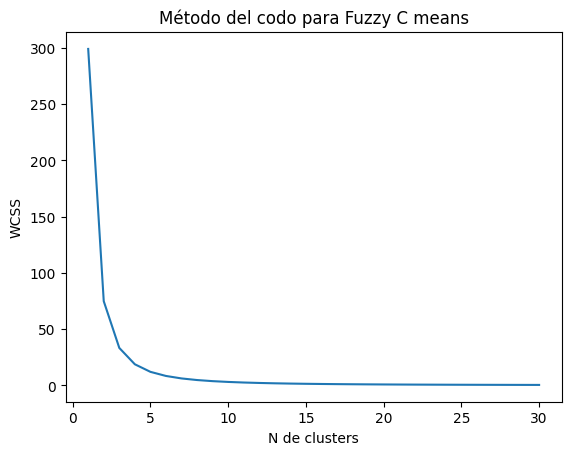

In [ ]:
fuzzy_inertia = []
cluster_numbers = []

#Se prueba el algoritmo con 1 a 30 clusters
for n_clusters in range(1, 31):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        datos_escalados_matriz, n_clusters, 2, error=0.005, maxiter=1000, init=None
    )
    avg_membership = np.mean(u, axis=0)

    #se calcula wcss
    inertia = np.sum(avg_membership**2)
    fuzzy_inertia.append(inertia)
    cluster_numbers.append(n_clusters)


plt.plot(cluster_numbers, fuzzy_inertia)
plt.xlabel('N de clusters')
plt.ylabel('WCSS')
plt.title('Método del codo para Fuzzy C means')
plt.show()


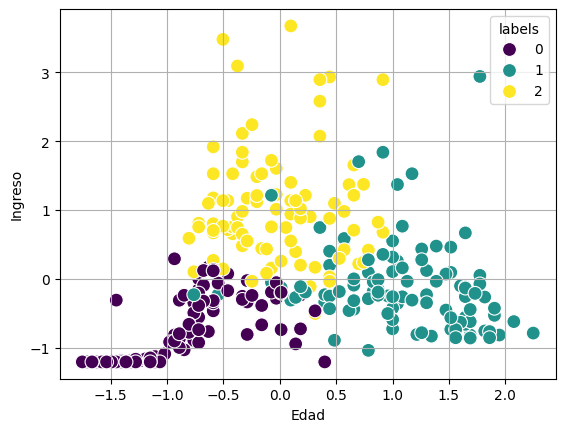

        Cluster_1   Cluster_2   Cluster_3
count  299.000000  299.000000  299.000000
mean     0.401726    0.304168    0.294106
std      0.303682    0.209938    0.177975
min      0.032322    0.007812    0.009628
25%      0.158469    0.116369    0.142149
50%      0.269177    0.294616    0.300029
75%      0.711171    0.453097    0.389087
max      0.982560    0.847265    0.803847


In [ ]:
#fuzzy c-means de nuevo, pero ahora con 3 clusters, como se indica en el método del codo

datos_escalados3 = datos.copy()
scaler3 = StandardScaler()
datos_escalados3[datos.columns] = scaler3.fit_transform(datos_escalados3[datos.columns])

datos_escalados3_matriz = datos_escalados3.values.T

n_clusters = 3

cntr3, u3, u03, d3, jm3, p3, fpc3 = fuzz.cluster.cmeans(
    datos_escalados3_matriz, n_clusters, 2, error=0.005, maxiter=1000, init=None)

labels = np.argmax(u3, axis=0)

datos_escalados3['labels'] = labels

sns.scatterplot(data=datos_escalados3, x='Age', y='Income', hue='labels', palette='viridis', s=100)
plt.xlabel('Edad')
plt.ylabel('Ingreso')
plt.grid()
plt.show()

cluster_summary = pd.DataFrame(u3.T, columns=[f'Cluster_{i+1}' for i in range(n_clusters)])
print(cluster_summary.describe())


In [ ]:
for i in range(n_clusters):
    centroid_data = cntr3[i, :]
    print(f"Centroide del cluster {i}: {centroid_data}")

Centroide del cluster 0: [-0.96191715 -0.77500853 -0.44307282  0.20449406 -0.30484776 -0.02953592]
Centroide del cluster 1: [ 0.89898814  0.06199246  0.30879014  0.07319813  0.33828352 -0.22542574]
Centroide del cluster 2: [ 0.17134324  0.71501583  0.07493021 -0.08837487 -0.02028001  0.08355717]
